<a href="https://colab.research.google.com/github/zarembaMichal/LetsStart/blob/main/MSI_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sieci Neuronowe

### Import niezbędnych bibliotek

In [308]:
from numpy import exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from IPython.display import display

### Zadanie 1




Napisz funkcję perceptron, która będzie realizowała obliczenia perceptronu z dwoma wejściami $x_1$ oraz $x_2$, z progową funkcją aktywacji. Jako wejście będzie przyjmowała wagi $w_1$, $w_2$ oraz wejścia $x_1,x_2 \in {0,1}$. Dobierz w sposób manualny wagi $w_1$, $w_2$ oraz $w_3$ do problemu:

1.  Operacja logiczna AND

Parametry perceptronu, takie jak \( $w_1$ = 0.2 \), \( $w_2$ = 0 \), \( $w_3$ = 0.1 \), mogą błędnie klasyfikować niektóre punkty dla operacji AND. Na przykład:
- Dla \( $x_1$ = 1 \), \( $x_2$ = 1 \), perceptron poprawnie przewiduje 1.
- Dla \( $x_1$ = 0 \), \( $x_2$ = 1 \), perceptron błędnie przewiduje 1 zamiast 0.

| \( $x_1$ \) | \( $x_2$ \) | \( $x_1$ AND $x_2$ \) |
|----------:|----------:|-----------------------------:|
|         0 |         0 |                           0 |
|         0 |         1 |                           0 |
|         1 |         0 |                           0 |
|         1 |         1 |                           1 |


2. Operacja logiczna OR

| \( $x_1$ \) | \( $x_2$ \) | \( $x_1$ OR $x_2$ \) |
|----------:|----------:|----------------------------:|
|         0 |         0 |                          0 |
|         0 |         1 |                          1 |
|         1 |         0 |                          1 |
|         1 |         1 |                          1 |


3. Operacja logiczna XOR

Czy perceptron może rozwiązać problem XOR?  
**Odpowiedź**: Nie, pojedyncza warstwa perceptronu nie może rozwiązać problemu XOR, ponieważ nie jest on liniowo separowalny.

| \( $x_1$ \) | \( $x_2$ \) | \( $x_1$ XOR $x_2$ \) |
|----------:|----------:|-----------------------------:|
|         0 |         0 |                           0 |
|         0 |         1 |                           1 |
|         1 |         0 |                           1 |
|         1 |         1 |                           0 |

In [309]:
def perceptron(w1, w2, w3, x1, x2):
  y = w1 * x1 + w2 * x2 + w3
  return 1 if y > 0 else 0

### Zadanie 2

Napisz procedurę train_ann, która zwróci krotkę wag (w1, w2). Funkcja powinna trenować sieć neuronową w trybie batchowym.

In [310]:
def train_ann(x, y, hidden = 10, eta = 0.1, it_nmb = 10000, seed = 42):
    nmb_of_inputs_in_w1 = x.shape[1] + 1
    nmb_of_inputs_in_w2 = hidden + 1
    nmb_of_outputs = y.shape[1]

    w1 = np.random.randn(nmb_of_inputs_in_w1, hidden)
    w2 = np.random.randn(nmb_of_inputs_in_w2, nmb_of_outputs)

    for i in range(0,it_nmb):
        outputs = compute_feed_forward(x, w1, w2)
        new_w = compute_backpropagation(x, y, outputs[0], outputs[1], w1, w2, eta)
        w1 = new_w[0]
        w2 = new_w[1]

    return (w1, w2)

### Zadanie 3


Zaimplementuj funkcję compute_feed_forward.

In [311]:
def sigmoid(x):
  return 1 / (1 + exp(-x))

In [312]:
def compute_feed_forward(x, w1, w2, activation_function = sigmoid):

    x = np.c_[x, np.repeat(1, x.shape[0])] #do macierzy danych uczących x dodajemy kolumnę z jedynkami, która reprezentuje wyraz wolny w warstwie wejściowej
    oh = activation_function(x @ w1)

    oh_b = np.c_[oh, np.repeat(1, oh.shape[0])]
    ou = activation_function(oh_b @ w2)

    return (ou, oh)

### Zadanie 4

Zaimplementuj funkcję compute_backpropagation.

In [313]:
def compute_backpropagation(x, y, ou, oh, w1, w2, eta):
    delta_u = (ou*(1-ou))*(y-ou)
    oh_b = np.c_[oh, np.repeat(1,oh.shape[0])]
    delta_h = (oh*(1-oh))*(delta_u @ w2[:-1].T)
    x_b = np.c_[x, np.repeat(1, x.shape[0])]

    w2 = w2 + oh_b.T @ delta_u * eta
    w1 = w1 + x_b.T @ delta_h * eta
    return (w1, w2)

### Zadanie 5

Zaimplementuj funkcję predict, która zwraca przewidywane wyniki na podstawie nauczonego modelu.

In [314]:
def predict(x, model, activation_function = sigmoid):
  x = np.c_[x, np.repeat(1, x.shape[0])]
  h = activation_function(x @ model[0])
  h2 = np.c_[h, np.repeat(1, h.shape[0])]
  out = activation_function(h2 @ model[1])

  return np.array([1.0 if element >0.5 else 0.0 for element in out])

### Zadanie 6

In [315]:
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[0],[0],[1]])

model = train_ann(x,y)
predict(x, model)

array([0., 0., 0., 1.])

### Zadanie 7
Podobnie jak w zadaniu z SVM załaduj zbiór “cats”:

In [316]:
cats = pd.read_csv("cats.csv")

#### a) Zbuduj model dla tego zbioru z wykorzystaniemmetod do trenowania sieci neuronowych z             poprzedniego zadania. Konieczna będzie transformacja danych wejściowych:

In [317]:
x = cats.iloc[:,1:]
y = cats.iloc[:,0]

y.loc[y=="F"] = 1.0
y.loc[y=="M"] = 0.0

y = y.to_numpy().reshape(-1,1).astype(np.float16)
x = x.astype(np.float16)

<ipython-input-317-518ed08b1836>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y=="F"] = 1.0
<ipython-input-317-518ed08b1836>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y=="M"] = 0.0


In [318]:
# Uczymy sieć na danych kotów x i y oraz robimy predykcję za pomocą predict

model = train_ann(x, y, hidden = 100, eta =0.15)

predictions  = predict(x,model)

In [319]:
# Obliczanie metryk
accuracy = metrics.accuracy_score(y, predictions)
precision = metrics.precision_score(y, predictions, zero_division=0)
recall = metrics.recall_score(y, predictions, zero_division=0)
f1 = metrics.f1_score(y, predictions, zero_division=0)
conf_matrix = metrics.confusion_matrix(y, predictions)

# Tworzymy ramkę danych z wynikami
results = pd.DataFrame([{
    "Model": "ANN Default",
    "Parameters": "hidden=100, eta=0.15",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1_Score": f1,
    "Confusion_Matrix": conf_matrix.tolist()  # Macierz jako lista
}])

# Zmieniamy opcje wyświetlania dla pandas
pd.set_option('display.max_columns', None)  # Wyświetl wszystkie kolumny
pd.set_option('display.max_colwidth', None)  # Wyświetl pełną szerokość tekstu w komórkach
pd.set_option('display.float_format', '{:.3f}'.format)  # Formatowanie liczb

# Drukowanie ramki danych
print(results)


         Model            Parameters  Accuracy  Precision  Recall  F1_Score  \
0  ANN Default  hidden=100, eta=0.15     0.674      0.000   0.000     0.000   

     Confusion_Matrix  
0  [[97, 0], [47, 0]]  


**Komentarz:** Brak skalowania danych wejściowych negatywnie wpływa na proces uczenia sieci neuronowej. Zmienna cecha o większych wartościach może zdominować obliczenia w trakcie propagacji, przez co model staje się mniej skuteczny w znajdowaniu właściwych zależności między zmiennymi. W konsekwencji, predykcja może być nieprecyzyjna, zwłaszcza dla cech o mniejszej skali.

#### b) Dokonaj przeskalowania danych zgodnie z poniższą formułą:

In [320]:
from sklearn import preprocessing

x_scaled = preprocessing.scale(x)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:261: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:280: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


In [321]:
# Uczymy model z domyślnym skalowaniem
model_scaled = train_ann(x_scaled, y, hidden=100)
predictions_scaled = predict(x_scaled, model_scaled)

In [322]:
# Obliczanie metryk dla modelu ze skalowaniem
accuracy_scaled = metrics.accuracy_score(y, predictions_scaled)
precision_scaled = metrics.precision_score(y, predictions_scaled, zero_division=0)
recall_scaled = metrics.recall_score(y, predictions_scaled, zero_division=0)
f1_scaled = metrics.f1_score(y, predictions_scaled, zero_division=0)
conf_matrix_scaled = metrics.confusion_matrix(y, predictions_scaled)

# Tworzymy nowy wiersz z wynikami
scaled_result = {
    "Model": "ANN Skaled",
    "Parameters": "hidden=100, eta=default",
    "Accuracy": accuracy_scaled,
    "Precision": precision_scaled,
    "Recall": recall_scaled,
    "F1_Score": f1_scaled,
    "Confusion_Matrix": conf_matrix_scaled.tolist()
}

# Dodanie nowego wiersza do istniejącej ramki danych
results = pd.concat([results, pd.DataFrame([scaled_result])], ignore_index=True)

# Wyświetlenie zaktualizowanej ramki danych
print(results)

         Model               Parameters  Accuracy  Precision  Recall  \
0  ANN Default     hidden=100, eta=0.15     0.674      0.000   0.000   
1   ANN Skaled  hidden=100, eta=default     0.875      0.774   0.872   

   F1_Score     Confusion_Matrix  
0     0.000   [[97, 0], [47, 0]]  
1     0.820  [[85, 12], [6, 41]]  


**Komentarz:** Dzięki ujednoliceniu rozkładu danych (średnia = 0, odchylenie standardowe = 1) model staje się bardziej stabilny i uczy się szybciej. Wynik może być lepszy w porównaniu do braku skalowania.

In [323]:
def plotCats(X, Y, model):
   x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
   y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
   h = .02
   xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
   predictions = predict(np.c_[xx.ravel(), yy.ravel()], model)

   predictions = predictions.reshape(xx.shape)

   f, ax = plt.subplots(figsize=(8, 6))
   contour = ax.contourf(xx, yy, predictions, 1, cmap="RdBu", vmin=0, vmax=1)

   ax_c = f.colorbar(contour)
   ax_c.set_label("Decision class")
   ax.scatter(X[:,0], X[:,1], c=y, s=55, cmap="RdBu", vmin=-.2, vmax=1.2,
              edgecolor="black", linewidth=1)

   ax.set( xlim=(x_min, x_max), ylim=(y_min, y_max), xlabel="Bwt", ylabel="Hwt")

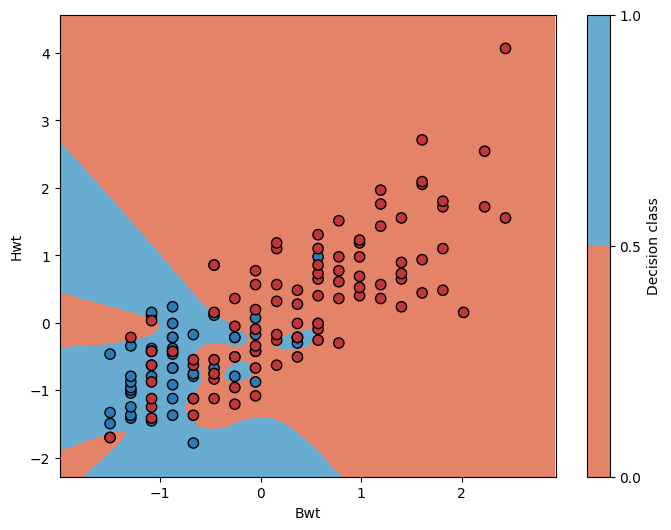

In [324]:
plotCats(x_scaled, y, model_scaled)

#### c) Zastosuj skalowanie Min - Max i porównaj wyniki.  

In [325]:
scaler = MinMaxScaler()

scaler.fit(x)
x_minmax_scaled = scaler.transform(x)
x_minmax_scaled.std(axis=0)

array([0.2544, 0.1709], dtype=float16)

In [326]:
# Uczymy model z MinMaxScaler
model_minmax_scaled = train_ann(x_minmax_scaled, y, hidden=10, eta=0.1)
predictions_minmax_scaled = predict(x_minmax_scaled, model_minmax_scaled)

In [327]:
# Obliczanie metryk dla modelu z MinMaxScaler
accuracy_minmax = metrics.accuracy_score(y, predictions_minmax_scaled)
precision_minmax = metrics.precision_score(y, predictions_minmax_scaled, zero_division=0)
recall_minmax = metrics.recall_score(y, predictions_minmax_scaled, zero_division=0)
f1_minmax = metrics.f1_score(y, predictions_minmax_scaled, zero_division=0)
conf_matrix_minmax = metrics.confusion_matrix(y, predictions_minmax_scaled)

# Tworzymy nowy wiersz z wynikami
minmax_result = {
    "Model": "ANN MinMaxScaler",
    "Parameters": "hidden=10, eta=0.1",
    "Accuracy": accuracy_minmax,
    "Precision": precision_minmax,
    "Recall": recall_minmax,
    "F1_Score": f1_minmax,
    "Confusion_Matrix": conf_matrix_minmax.tolist()
}

# Dodanie nowego wiersza do istniejącej ramki danych
results = pd.concat([results, pd.DataFrame([minmax_result])], ignore_index=True)

# Wyświetlenie zaktualizowanej ramki danych
print(results)

              Model               Parameters  Accuracy  Precision  Recall  \
0       ANN Default     hidden=100, eta=0.15     0.674      0.000   0.000   
1        ANN Skaled  hidden=100, eta=default     0.875      0.774   0.872   
2  ANN MinMaxScaler       hidden=10, eta=0.1     0.792      0.689   0.660   

   F1_Score      Confusion_Matrix  
0     0.000    [[97, 0], [47, 0]]  
1     0.820   [[85, 12], [6, 41]]  
2     0.674  [[83, 14], [16, 31]]  


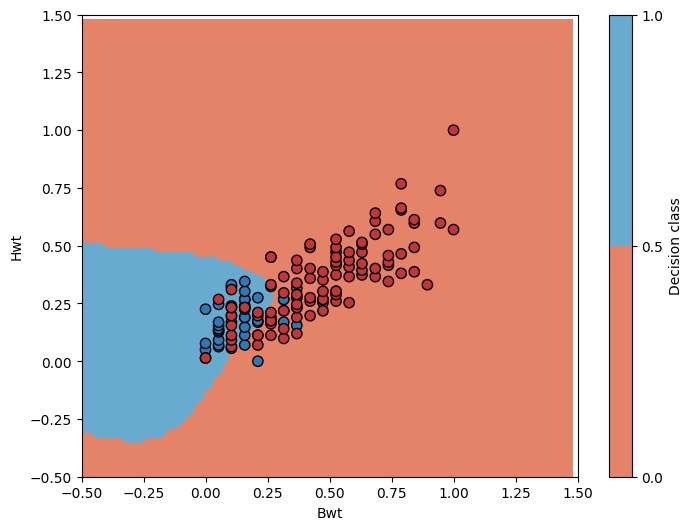

In [328]:
plotCats(x_minmax_scaled, y, model_minmax_scaled)

**Komentarz:** Normalizacja do przedziału [0, 1] eliminuje różnice w wielkości cech, co pozwala modelowi na lepsze uchwycenie wzorców w danych. Wynik może być podobny lub lepszy niż przy skalowaniu standardowym.

In [329]:
# Stworzenie ramki w wynikami modeli SVM z poprzednich labolatoriów
# Wyniki dla SVM z wagami
conf_matrix_weighted = [[41, 6], [19, 78]]
precision_weighted = 0.85  # weighted avg precision
recall_weighted = 0.83     # weighted avg recall
f1_weighted = 0.83         # weighted avg f1-score
accuracy_weighted = 0.83   # overall accuracy

# Dodanie wyników dla SVM z wagami
svm_weighted_result = {
    "Model": "SVM z wagami",
    "Parameters": "C=1, kernel='rbf', gamma=5, class_weight=custom",
    "Accuracy": accuracy_weighted,
    "Precision": precision_weighted,
    "Recall": recall_weighted,
    "F1_Score": f1_weighted,
    "Confusion_Matrix": conf_matrix_weighted
}

# Wyniki dla SVM bez wag
conf_matrix_unweighted = [[38, 9], [12, 85]]
precision_unweighted = 0.86  # weighted avg precision
recall_unweighted = 0.85     # weighted avg recall
f1_unweighted = 0.86         # weighted avg f1-score
accuracy_unweighted = 0.85   # overall accuracy

# Dodanie wyników dla SVM bez wag
svm_unweighted_result = {
    "Model": "SVM bez wag",
    "Parameters": "C=1, kernel='rbf', gamma=5",
    "Accuracy": accuracy_unweighted,
    "Precision": precision_unweighted,
    "Recall": recall_unweighted,
    "F1_Score": f1_unweighted,
    "Confusion_Matrix": conf_matrix_unweighted
}

# Wyniki dla najlepszego modelu SVM z GridSearchCV
conf_matrix_best_svm = [[36, 11], [15, 82]]
precision_best = 0.82  # weighted avg precision
recall_best = 0.82     # weighted avg recall
f1_best = 0.82         # weighted avg f1-score
accuracy_best = 0.82   # overall accuracy

# Dodanie wyników dla najlepszego modelu SVM
best_svm_result = {
    "Model": "SVM best model",
    "Parameters": "best SVM",  # Zapisywanie najlepszych parametrów
    "Accuracy": accuracy_best,
    "Precision": precision_best,
    "Recall": recall_best,
    "F1_Score": f1_best,
    "Confusion_Matrix": conf_matrix_best_svm
}

In [330]:
# Dodanie wyników do istniejącej ramki danych
results = pd.concat([results, pd.DataFrame([svm_weighted_result, svm_unweighted_result, best_svm_result])], ignore_index=True)

In [331]:
# Wyświetlenie ramki danych
display(results)

,Model,Parameters,Accuracy,Precision,Recall,F1_Score,Confusion_Matrix
0,ANN Default,"hidden=100, eta=0.15",0.674,0.000,0.000,0.000,"[[97, 0], [47, 0]]"
1,ANN Skaled,"hidden=100, eta=default",0.875,0.774,0.872,0.820,"[[85, 12], [6, 41]]"
2,ANN MinMaxScaler,"hidden=10, eta=0.1",0.792,0.689,0.660,0.674,"[[83, 14], [16, 31]]"
3,SVM z wagami,"C=1, kernel='rbf', gamma=5, class_weight=custom",0.830,0.850,0.830,0.830,"[[41, 6], [19, 78]]"
4,SVM bez wag,"C=1, kernel='rbf', gamma=5",0.850,0.860,0.850,0.860,"[[38, 9], [12, 85]]"
5,SVM best model,best SVM,0.820,0.820,0.820,0.820,"[[36, 11], [15, 82]]"


**Wniosek:** Zarówno modele ANN, jak i SVM, mogą osiągać dobre wyniki, jednak wybór odpowiedniej metody zależy od konkretnego problemu, dostępnych danych oraz wymagań związanych z precyzją i czułością. W przypadku większej liczby iteracji i odpowiedniej konfiguracji, ANN może być równie dobrym wyborem jak SVM.